In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
with open('CT_En10.pickle','rb') as f:
    data=pickle.load(f)

In [10]:
p_ctrl_list=np.linspace(0,1,2)
p_proj_list=np.linspace(0,1,2)
L_list=np.array([10,12,])

Text(0.5, 0, '$p_{ctrl}$')

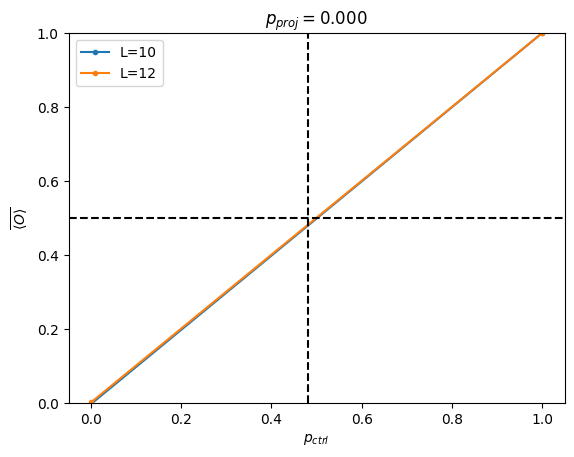

In [11]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['O'].shape[0]):
    ax.plot(p_ctrl_list,data['O'][i,:,p_proj_idx].mean(axis=-1),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.48,ls='dashed',color='k')
ax.axhline(y=0.5,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_ylim([0,1])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel(r'$\overline{\langle O \rangle}$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

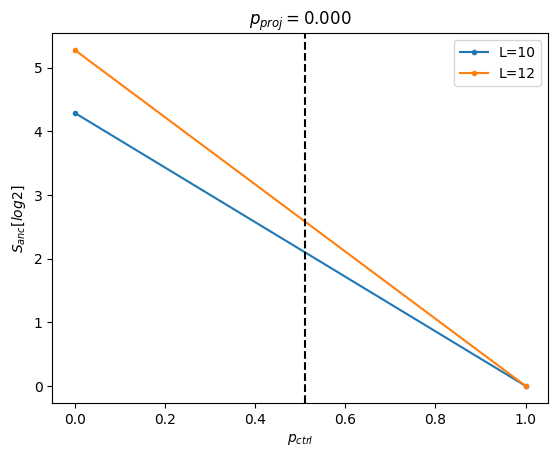

In [12]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['EE'].shape[0]):
    ax.plot(p_ctrl_list,data['EE'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel('$S_{anc} [log 2]$')
ax.set_xlabel('$p_{ctrl}$')

Text(0.5, 0, '$p_{ctrl}$')

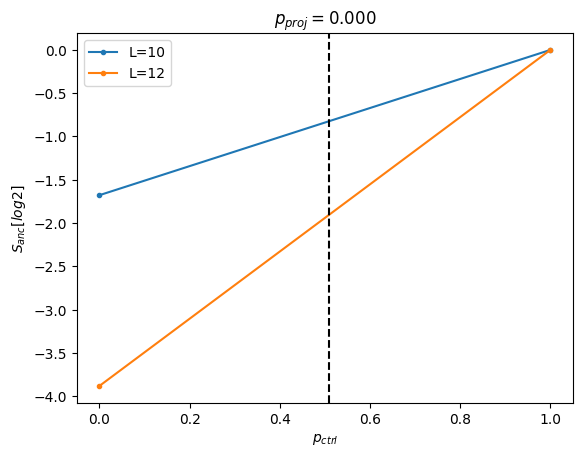

In [13]:
fig,ax=plt.subplots()
p_proj_idx=0
for i in range(data['TMI'].shape[0]):
    ax.plot(p_ctrl_list,data['TMI'][i,:,p_proj_idx].mean(axis=-1)/np.log(2),'.-',label=f'L={L_list[i]}')
ax.legend()
ax.axvline(x=0.51,ls='dashed',color='k')
# ax.set_xlim([.2,.8])
ax.set_title(f'$p_{{proj}}={p_proj_list[p_proj_idx]:.3f}$')
ax.set_ylabel('$S_{anc} [log 2]$')
ax.set_xlabel('$p_{ctrl}$')